# E04: Tiempo Universal frente a Tiempo Local

In [1]:
# importamos las librerías que vamos a necesitar
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import numpy as np

# nuestra librería
import ist_lib as ist

folder='dst_stations/2015-03/'
month='201503'

# observatorios usados para el índice Dst
obs=['her','hon','kak','sjg']

# días a observar: seis primmeros días '01' - '05'
qs=pd.Series(range(1,6))
qs=pd.Series.tolist(qs.apply(lambda x: '{0:0>2}'.format(x)))
print(qs)

# variable para guardar todos los datos (1440 minutos) de los cuatro observatorios,
# los días necesarios
dat = np.zeros([len(obs),len(qs),1440])

# leer todos los días en calma del mes para cada observatorio (sólo la componente H (c1))
for o in obs:
    for q in qs:
        filename=folder + o + '/' + o + month + q + 'qmin.min'
        df=ist.read_im(filename=filename)
        data=df['data']
        dat[obs.index(o)][qs.index(q)][:]=data.c1

['01', '02', '03', '04', '05']


# Observemos los datos de 5 días consecutivos

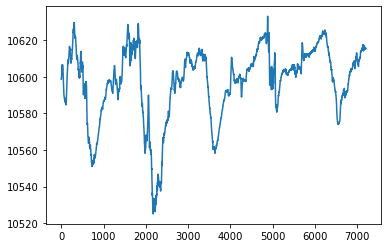

In [2]:
# Días de HER
plt.plot(dat[0][:][:].reshape(-1));

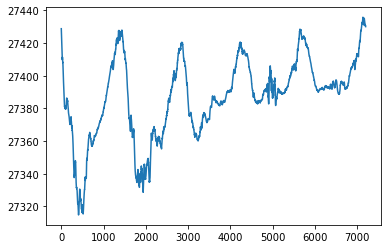

In [3]:
# Días de HON
plt.plot(dat[1][:][:].reshape(-1));

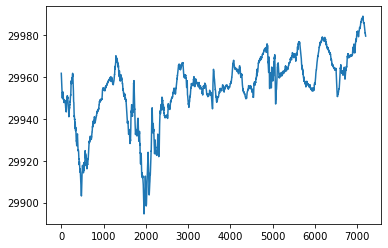

In [4]:
# Días de KAK
plt.plot(dat[2][:][:].reshape(-1));

Para SJG vemos que sucede algo que no ha ocurrido antes:

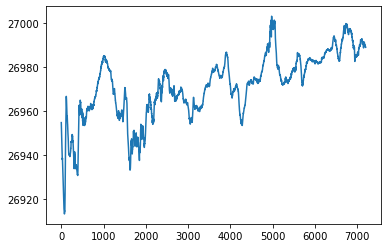

In [5]:
# Días de SJG
plt.plot(dat[3][:][:].reshape(-1));

## P01: Comenta a qué se deben las variaciones periódicas observadas y si observas alguna tendencia en los datos. 
### R01:

# Vamos a marcar los cambios de día local en cada una de las figuras

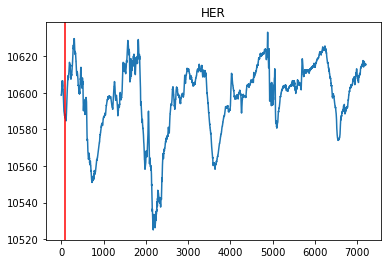

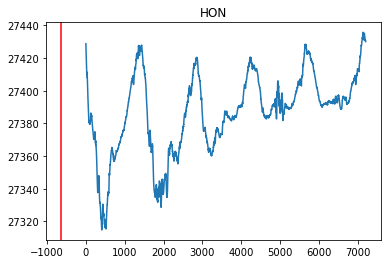

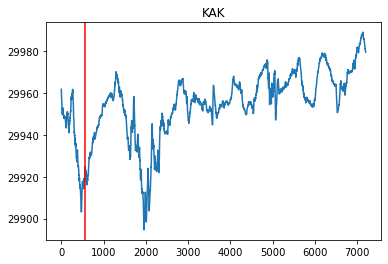

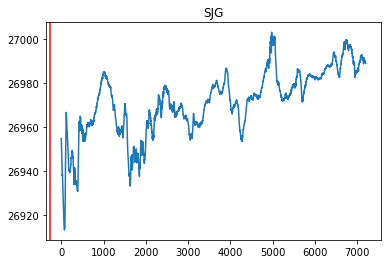

In [6]:
# Obtenemos las longitudes de los cuatro observatorios como hicimos en ejemplos anteriores
lons=['','','','']
for o in obs:
    filename=folder + o + '/' + o + month + q + 'qmin.min'
    df=ist.read_im(filename=filename)
    lons[obs.index(o)]=df['lon']
    
# Convertimos las longitudes al rango entre -180 y 180    
lons = [(float(lon) + 180) % 360 - 180 for lon in lons]

# Calculamos el número de minutos en que se situa el cambio de día local respecto de UT
mins=[]
for lon in lons:
    mins.append(-int(lon / 360 * 1440))

# Mostramos en un gráfica donde se sitúa dicho punto (media noche local)
# Para HER
plt.plot(dat[0][:][:].reshape(-1));
plt.axvline(x = mins[0], color = 'r')
plt.title('HER')
plt.show();

# Para HON
plt.plot(dat[1][:][:].reshape(-1));
plt.axvline(x = mins[1], color = 'r')
plt.title('HON')
plt.show();

# Para KAK
plt.plot(dat[2][:][:].reshape(-1));
plt.axvline(x = mins[2], color = 'r')
plt.title('KAK')
plt.show();

# Para SJG
plt.plot(dat[3][:][:].reshape(-1));
plt.axvline(x = mins[3], color = 'r')
plt.title('SJG')
plt.show();

## P02: ¿A qué crees que se debe el desplazamiento hacia fuera de los datos de algunas de las barras rojas?. Comenta si tiene sentido o no.

### R02:

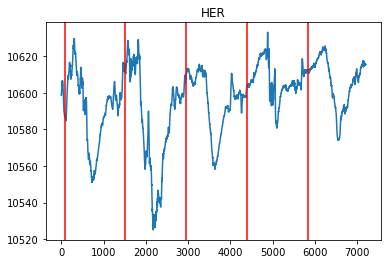

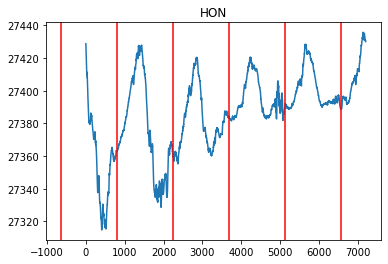

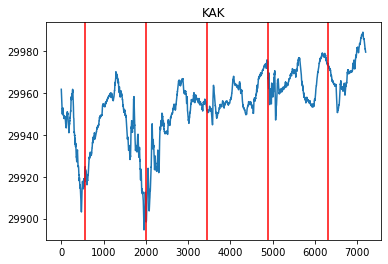

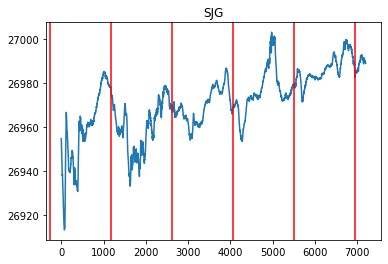

In [7]:
# Mostremos la localización de todas las noches locales
# número de días
n=len(qs)

# Para HER
io=0
plt.plot(dat[io][:][:].reshape(-1));
noches = range(mins[io],mins[io]+n*1440,1440)
for i in range(n):
    plt.axvline(x = noches[i], color = 'r')
# una línea extra si la longitud es negativa    
if noches[0] < 0:
    plt.axvline(x = noches[-1]+1440, color='r')
plt.title('HER')
plt.show();

# Para HON
io=1
plt.plot(dat[io][:][:].reshape(-1));
noches = range(mins[io],mins[io]+n*1440,1440)
for i in range(n):
    plt.axvline(x = noches[i], color = 'r')
# una línea extra si la longitud es negativa    
if noches[0] < 0:
    plt.axvline(x = noches[-1]+1440, color='r')
plt.title('HON')
plt.show();

# Para KAK
io=2
plt.plot(dat[io][:][:].reshape(-1));
noches = range(mins[io],mins[io]+n*1440,1440)
for i in range(n):
    plt.axvline(x = noches[i], color = 'r')
# una línea extra si la longitud es negativa    
if noches[0] < 0:
    plt.axvline(x = noches[-1]+1440, color='r')
plt.title('KAK')
plt.show();

# Para SJG
io=3
plt.plot(dat[io][:][:].reshape(-1));
noches = range(mins[io],mins[io]+n*1440,1440)
for i in range(n):
    plt.axvline(x = noches[i], color = 'r')
# una línea extra si la longitud es negativa    
if noches[0] < 0:
    plt.axvline(x = noches[-1]+1440, color='r')
plt.title('SJG')
plt.show();

## P03: ¿A qué día local pertenece la línea extra que hemos dibujado en algunos observatorios?, ¿a qué día universal?

### R03:

# Veamos ahora los valores durante la media noche

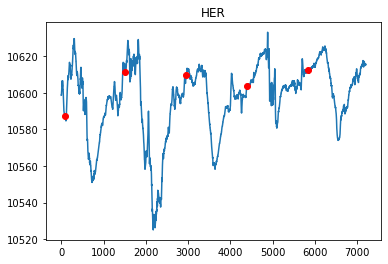

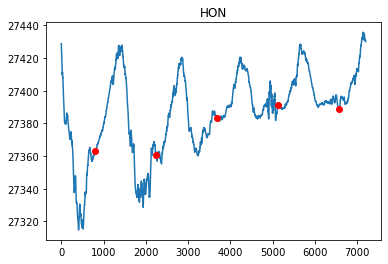

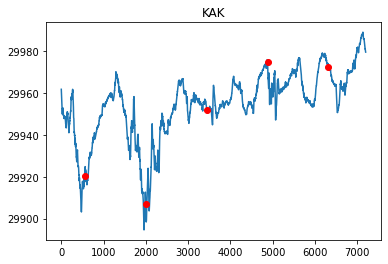

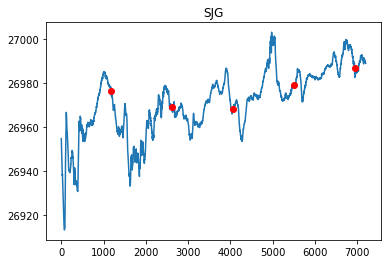

In [8]:
# Para HER
io=0
datos=dat[io][:][:].reshape(-1)
plt.plot(datos);
noches = list(range(mins[io],mins[io]+n*1440,1440))
values = [0.]*n
for i in range(n):
    values[i] = datos[noches[i]]
# si la longitud es negativa el primer valor corresponde al último día  
if noches[0] < 0:
    noches[0] = noches[-1]+1440
plt.scatter(noches,values, color='r', zorder=2)
plt.title(obs[io].upper())
plt.show();

# Para HON
io=1
datos=dat[io][:][:].reshape(-1)
plt.plot(datos);
noches = list(range(mins[io],mins[io]+n*1440,1440))
values = [0.]*n
for i in range(n):
    values[i] = datos[noches[i]]
# si la longitud es negativa el primer valor corresponde al último día  
if noches[0] < 0:
    noches[0] = noches[-1]+1440
plt.scatter(noches,values, color='r', zorder=2)
plt.title(obs[io].upper())
plt.show();

# Para KAK
io=2
datos=dat[io][:][:].reshape(-1)
plt.plot(datos);
noches = list(range(mins[io],mins[io]+n*1440,1440))
values = [0.]*n
for i in range(n):
    values[i] = datos[noches[i]]
# si la longitud es negativa el primer valor corresponde al último día  
if noches[0] < 0:
    noches[0] = noches[-1]+1440
plt.scatter(noches,values, color='r', zorder=2)
plt.title(obs[io].upper())
plt.show();

# Para SJG
io=3
datos=dat[io][:][:].reshape(-1)
plt.plot(datos);
noches = list(range(mins[io],mins[io]+n*1440,1440))
values = [0.]*n
for i in range(n):
    values[i] = datos[noches[i]]
# si la longitud es negativa el primer valor corresponde al último día  
if noches[0] < 0:
    noches[0] = noches[-1]+1440
plt.scatter(noches,values, color='r', zorder=2)
plt.title(obs[io].upper())
plt.show();

## P04: Los puntos marcados en rojo, ¿son valores afectados por la ionosfera?, comenta si existen otros menos afectados por la ionosfera.

### R04:

# Veamos una ligera modificación, obtiendo los valores promedios de dos horas centradas en la media noche

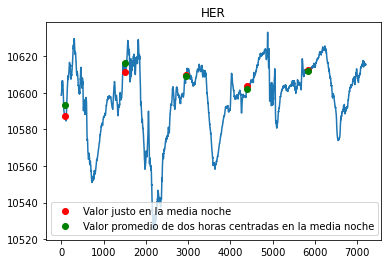

In [9]:
# Para HER
io=0
datos=dat[io][:][:].reshape(-1)
plt.plot(datos);
noches = list(range(mins[io],mins[io]+n*1440,1440))
values = [0.]*n
mean_vals = [0.]*n
for i in range(n):
    values[i] = datos[noches[i]]
    mean_vals[i] = np.mean(datos[noches[i]-60:noches[i]+60])
# si la longitud es negativa el primer valor corresponde al último día  
if noches[0] < 0:
    noches[0] = noches[-1]+1440
plt.scatter(noches,values, color='r', zorder=2, label='Valor justo en la media noche')
plt.scatter(noches,mean_vals, color='g', zorder=2, label='Valor promedio de dos horas centradas en la media noche')

plt.title(obs[io].upper())
plt.legend()
plt.show();

## A05: ¿Qué utilidad crees que puede tener obtener dichos valores?

### R05: